# FINAL PROJECT: VARIANT 3

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency, chi2, mannwhitneyu, shapiro, kruskal
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ztest
from scipy.stats import shapiro
import statsmodels.stats.api as sms
from tqdm.auto import tqdm

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

# PROJECT:
It is a large dating app.

In addition to the basic functions, the application also has a premium subscription,
which gives access to a number of important additional features.
An A/B test was conducted, in which the price of a premium subscription was changed for new users from several countries *
when buying through two new payment systems. At the same time, the cost of the trial period remained the same.
*Subscription money is charged monthly until the user cancels it.

Check:
> Was the experiment successful overall.

>Analyze whether the innovation makes sense among any specific user groups.
  

#  SOLUTION:
1. Explored the data. We checked the data for their correctness and outliers.
2. Determined the key metrics that we are interested in.
3. A/A test: tested the split system.
4. A/B test: conducted the presence and quality of the effect of the innovation.
5. Determine which groups were positively affected by the experiment.

# CONCLUSION
Based on the results of the data check and the A / A / B test, we cannot say for sure that the test was successful, because:
1. ARPU did not change significantly;
2. ARPPU has statistically significantly changed in a positive direction;
3. CR in premium subscription (any is_premium) for premium has statistically significantly decreased. Moreover, the decrease was in the age group 25-39;

What to do?
It is worth continuing the test but with a change in conditions:
1. It makes sense to keep the 25-39 age group and approach it differently. (discount, special offer, clearer payment method)
2. Monthly subscription, we do not know the trail_premium period, it makes sense to collect data when changing the monthly subscription not for 4 weeks (month), but for 5 weeks, then we will see the real conversion. Since the first user is probably using a free trial period.
3. An error was made in collecting the dates of registrations and payments. You should check the form for collecting this information.
4. 23-24% of registered users did not activate, never entered the application. You should check whether these users are real, as well as what problems could arise when activating the account.
5. A/B test result for ARPPU we can reject the null hypothesis about the absence of a statistically significant difference for ARPPU for all paying users, we have a statistically significant change for premium_no_trail, and for everyone who is_premium, and just paying users, nevertheless it is necessary to clarify what is_premium means, as well as others.

### 1. DATA RESEARCH

##### 1.1. reading data 
We read the data, added parse_dates to read the correct dates.

In [2]:
u_test      = pd.read_csv('Проект_3_users_test.csv', sep=';')
u_control_1 = pd.read_csv('Проект_3_users_control_1.csv', sep=';')
u_control_2 = pd.read_csv('Проект_3_users_control_2.csv', sep=';')

t_test      = pd.read_csv('Проект_3_transactions_test.csv', sep=';')
t_control_1 = pd.read_csv('Проект_3_transactions_control_1.csv', sep=';')
t_control_2 = pd.read_csv('Проект_3_transactions_control_2.csv', sep=';')   

In [3]:
t_test['joined_at']      = pd.to_datetime(t_test.joined_at, format="%Y-%m-%d %H:%M:%S")
t_test['paid_at']        = pd.to_datetime(t_test.paid_at, format="%Y-%m-%d %H:%M:%S")
t_control_1['joined_at'] = pd.to_datetime(t_test.joined_at, format="%Y-%m-%d %H:%M:%S")
t_control_1['paid_at']   = pd.to_datetime(t_test.paid_at, format="%Y-%m-%d %H:%M:%S")
t_control_2['joined_at'] = pd.to_datetime(t_test.joined_at, format="%Y-%m-%d %H:%M:%S")
t_control_2['paid_at']   = pd.to_datetime(t_test.paid_at, format="%Y-%m-%d %H:%M:%S")

##### 1.2. Check shape, dtypes, nunique, isnull and etc.

In [4]:
#check each data for common characteristic 
print(f'DATAFRAME:u_test')
print(f'SHAPE:{u_test.shape}\n')
print(f'NUNIQUE:\n{u_test.nunique()}\n')
print(f'EMPTRY VALUES: \n{u_test.isna().sum()}\n')
print(f'DUPLICATES: {u_test.duplicated().sum()}\n')
print(f'UID DUPLICATES: {u_test.duplicated(subset="uid").sum()}\n')
print(f'COLUMNS TYPES: \n{u_test.dtypes}\n')

print(f'DATAFRAME: t_test')
print(f'SHAPE:{t_test.shape}\n')
print(f'NUNIQUE:\n{t_test.nunique()}\n')
print(f'EMPTRY VALUES: \n{t_test.isna().sum()}\n')
print(f'DUPLICATES: {t_test.duplicated().sum()}\n')
print(f'UID DUPLICATES: {t_test.duplicated(subset="uid").sum()}\n')
print(f'COLUMNS TYPES: \n{t_test.dtypes}\n')

DATAFRAME:u_test
SHAPE:(4308, 13)

NUNIQUE:
uid                 4308
age                   57
attraction_coeff     600
coins                 28
country               51
visit_days           891
gender                 2
age_filter_start      51
age_filter_end        78
views_count          331
was_premium            1
is_premium             1
total_revenue        105
dtype: int64

EMPTRY VALUES: 
uid                    0
age                    0
attraction_coeff       0
coins               4259
country                0
visit_days          1330
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3900
is_premium          4151
total_revenue          0
dtype: int64

DUPLICATES: 0

UID DUPLICATES: 0

COLUMNS TYPES: 
uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start

In [5]:
#check each data for common characteristic 
print(f'DATAFRAME:u_control_1')
print(f'SHAPE:{u_control_1.shape}\n')
print(f'NUNIQUE:\n{u_control_1.nunique()}\n')
print(f'EMPTRY VALUES: \n{u_control_1.isna().sum()}\n')
print(f'DUPLICATES: {u_control_1.duplicated().sum()}\n')
print(f'UID DUPLICATES: {u_control_1.duplicated(subset="uid").sum()}\n')
print(f'COLUMNS TYPES: \n{u_control_1.dtypes}\n')

print(f'DATAFRAME: t_control_1')
print(f'SHAPE:{t_control_1.shape}\n')
print(f'NUNIQUE:\n{t_control_1.nunique()}\n')
print(f'EMPTRY VALUES: \n{t_control_1.isna().sum()}\n')
print(f'DUPLICATES: {t_control_1.duplicated().sum()}\n')
print(f'UID DUPLICATES: {t_control_1.duplicated(subset="uid").sum()}\n')
print(f'COLUMNS TYPES: \n{t_control_1.dtypes}\n')

DATAFRAME:u_control_1
SHAPE:(4340, 13)

NUNIQUE:
uid                 4340
age                   56
attraction_coeff     587
coins                 22
country               40
visit_days           880
gender                 2
age_filter_start      53
age_filter_end        78
views_count          339
was_premium            1
is_premium             1
total_revenue        128
dtype: int64

EMPTRY VALUES: 
uid                    0
age                    0
attraction_coeff       0
coins               4280
country                0
visit_days          1324
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3904
is_premium          4148
total_revenue          0
dtype: int64

DUPLICATES: 0

UID DUPLICATES: 0

COLUMNS TYPES: 
uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_

In [6]:
#check each data for common characteristic 
print(f'DATAFRAME:u_control_2')
print(f'SHAPE:{u_control_2.shape}\n')
print(f'NUNIQUE:\n{u_control_2.nunique()}\n')
print(f'EMPTRY VALUES: \n{u_control_2.isna().sum()}\n')
print(f'DUPLICATES: {u_control_2.duplicated().sum()}\n')
print(f'UID DUPLICATES: {u_control_2.duplicated(subset="uid").sum()}\n')
print(f'COLUMNS TYPES: \n{u_control_2.dtypes}\n')

print(f'DATAFRAME: t_control_2')
print(f'SHAPE:{t_control_2.shape}\n')
print(f'NUNIQUE:\n{t_control_2.nunique()}\n')
print(f'EMPTRY VALUES: \n{t_control_2.isna().sum()}\n')
print(f'DUPLICATES: {t_control_2.duplicated().sum()}\n')
print(f'UID DUPLICATES: {t_control_2.duplicated(subset="uid").sum()}\n')
print(f'COLUMNS TYPES: \n{t_control_2.dtypes}\n')

DATAFRAME:u_control_2
SHAPE:(4264, 13)

NUNIQUE:
uid                 4264
age                   59
attraction_coeff     585
coins                 23
country               45
visit_days           837
gender                 2
age_filter_start      56
age_filter_end        79
views_count          328
was_premium            1
is_premium             1
total_revenue        128
dtype: int64

EMPTRY VALUES: 
uid                    0
age                    0
attraction_coeff       0
coins               4203
country                0
visit_days          1364
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3853
is_premium          4073
total_revenue          0
dtype: int64

DUPLICATES: 0

UID DUPLICATES: 0

COLUMNS TYPES: 
uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_

##### 1.3. Our questions /  Вопросы к данным:
- Each row in the user data (in the test and control groups) corresponds to a unique user
- There is a significant part of empty values ​​that we convert to 0
- There are a lot of duplicate rows in the control_1 transaction data, there are also duplicate rows in other transaction data, we will delete them
- Data types are not convenient for work, you need to change, convert to categorical
- The visit_days column needs to be expanded into the number of days of visit, ideally in the category by duration of use, since it is important how many months the user enters the application
- For what period do we have data?
- Check total revenue and revenue

In [7]:
#delete duplicates from and check again duplicated rows
t_test.drop_duplicates(inplace=True)
t_control_1.drop_duplicates(inplace=True)
t_control_2.drop_duplicates(inplace=True)

print(f'DUPLICATES t_test: {t_test.duplicated().sum()}\n')
print(f'DUPLICATES t_control_1: {t_control_1.duplicated().sum()}\n')
print(f'DUPLICATES t_control_2: {t_control_2.duplicated().sum()}\n')

DUPLICATES t_test: 0

DUPLICATES t_control_1: 0

DUPLICATES t_control_2: 0



In [8]:
#connect all datas to one for more comfortale analyse.
#first we add group type to each dataframe, then concat them
t_test=t_test.assign(group='test')
t_control_1=t_control_1.assign(group='control_1')
t_control_2=t_control_2.assign(group='control_2')
u_test=u_test.assign(group='test')
u_control_1=u_control_1.assign(group='control_1')
u_control_2=u_control_2.assign(group='control_2')

#connect all data to two segement: users and transactions
users=pd.concat([u_test, u_control_1, u_control_2], ignore_index=True)
transactions=pd.concat([t_test, t_control_1, t_control_2], ignore_index=True)

In [9]:
#all Nan =>0 
users=users.fillna(0)

In [10]:
#change types of some data, uid change to int, becouse we have .0 in t_control_1
users=users.astype({'uid':'int', 'was_premium':'int', 'is_premium':'int', 'visit_days':'string', 'gender':'object'})

In [11]:
transactions.dtypes

uid                    float64
country                 object
joined_at       datetime64[ns]
paid_at         datetime64[ns]
revenue                float64
payment_id             float64
from_page               object
product_type            object
group                   object
dtype: object

In [12]:
#check how many we have premium_no_trail - they pay new price
transactions.query('product_type=="premium_no_trial"')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
5,892426491.0,United States of America,2017-10-14 10:13:00,2017-10-15 22:39:00,12597.0,147.0,autoreply_message,premium_no_trial,test
6,891558921.0,United States of America,2017-01-11 03:07:00,2017-10-11 09:05:00,9100.0,147.0,left_sidebar_menu,premium_no_trial,test
11,891861048.0,Canada,2017-10-26 02:55:00,2017-10-11 19:00:00,3588.0,68.0,none,premium_no_trial,test
12,891178380.0,Spain,2017-08-11 03:54:00,2017-09-11 21:53:00,113477.0,147.0,promo_09,premium_no_trial,test
21,891312873.0,Italy,2017-05-11 21:22:00,2017-10-11 21:51:00,7852.0,147.0,promo_09,premium_no_trial,test
...,...,...,...,...,...,...,...,...,...
952,891393735.0,Spain,NaT,NaT,6292.0,147.0,dating,premium_no_trial,control_2
953,892053750.0,United States of America,NaT,NaT,6292.0,147.0,autoreply_message,premium_no_trial,control_2
956,892032072.0,United Kingdom (Great Britain),NaT,NaT,3588.0,68.0,none,premium_no_trial,control_2
957,891435993.0,Canada,NaT,NaT,3549.0,68.0,none,premium_no_trial,control_2


In [13]:
# change and add more detailed information about frequency of using application 
users['duration_of_using']=users.visit_days.str.split(',').apply(lambda x: max([int(d) for d in x]))
users.head(10)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,duration_of_using
0,892309896,27,685,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,0,0,0,test,17
1,892044516,27,0,0.0,Germany,0,1,24,30,0,0,0,0,test,0
2,892185708,45,44,0.0,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,0,0,0,test,26
3,892130292,32,0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,0,0,0,test,12
4,891406035,27,1000,0.0,France,0,1,24,30,1,1,0,0,test,0
5,891083133,24,0,0.0,Spain,1,1,16,27,0,0,0,0,test,1
6,891304281,39,0,0.0,France,0,1,36,42,0,0,0,0,test,0
7,892431420,21,909,0.0,Australia,0,1,18,24,11,0,0,0,test,0
8,891085770,28,0,0.0,Italy,"1,2,3,4",1,25,31,1,0,0,0,test,4
9,891142707,30,600,0.0,Israel,"1,2,4,5,6",1,19,33,10,0,0,0,test,6


In [14]:
#add amount days_of_using, it helps us to calculate frequency later 
users['days_of_using']=users.query('duration_of_using!=0').visit_days.str.split(',').apply(lambda x: len(x))
users['days_of_using']=users.days_of_using.fillna(0)
users.head(10)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,duration_of_using,days_of_using
0,892309896,27,685,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,0,0,0,test,17,14.0
1,892044516,27,0,0.0,Germany,0,1,24,30,0,0,0,0,test,0,0.0
2,892185708,45,44,0.0,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,0,0,0,test,26,20.0
3,892130292,32,0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,0,0,0,test,12,12.0
4,891406035,27,1000,0.0,France,0,1,24,30,1,1,0,0,test,0,0.0
5,891083133,24,0,0.0,Spain,1,1,16,27,0,0,0,0,test,1,1.0
6,891304281,39,0,0.0,France,0,1,36,42,0,0,0,0,test,0,0.0
7,892431420,21,909,0.0,Australia,0,1,18,24,11,0,0,0,test,0,0.0
8,891085770,28,0,0.0,Italy,"1,2,3,4",1,25,31,1,0,0,0,test,4,4.0
9,891142707,30,600,0.0,Israel,"1,2,4,5,6",1,19,33,10,0,0,0,test,6,5.0


In [15]:
users.dtypes

uid                    int64
age                    int64
attraction_coeff       int64
coins                float64
country               object
visit_days            string
gender                object
age_filter_start       int64
age_filter_end         int64
views_count            int64
was_premium            int64
is_premium             int64
total_revenue          int64
group                 object
duration_of_using      int64
days_of_using        float64
dtype: object

In [16]:
#check total amount of users
users.shape

(12912, 16)

In [17]:
#check total amount of transactions
transactions.shape

(963, 9)

In [18]:
#read common description of all users
users.describe(include='all')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,duration_of_using,days_of_using
count,1.291200e+04,12912.000000,12912.000000,12912.000000,12912,12912,12912.0,12912.000000,12912.000000,12912.000000,12912.000000,12912.000000,12912.000000,12912,12912.000000,12912.00000
unique,NaN,NaN,NaN,NaN,72,2133,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,United States of America,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,control_1,NaN,NaN
freq,NaN,NaN,NaN,NaN,4407,4018,12333.0,NaN,NaN,NaN,NaN,NaN,NaN,4340,NaN,NaN
mean,8.917569e+08,32.010378,315.455545,9.070864,NaN,NaN,NaN,26.815985,38.568463,46.641032,0.097196,0.041822,526.837283,NaN,5.947336,4.55855
std,1.610285e+06,10.224415,323.488766,883.417344,NaN,NaN,NaN,9.447197,15.511204,285.324194,0.296236,0.200189,5524.662716,NaN,8.841911,6.22509
min,8.910509e+08,16.000000,0.000000,0.000000,NaN,NaN,NaN,13.000000,19.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.00000
25%,8.913565e+08,25.000000,0.000000,0.000000,NaN,NaN,NaN,19.000000,28.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.00000
50%,8.917255e+08,30.000000,250.000000,0.000000,NaN,NaN,NaN,25.000000,35.000000,6.000000,0.000000,0.000000,0.000000,NaN,2.000000,2.00000
75%,8.920860e+08,38.000000,529.000000,0.000000,NaN,NaN,NaN,32.000000,45.000000,21.000000,0.000000,0.000000,0.000000,NaN,9.000000,7.00000


### Age check

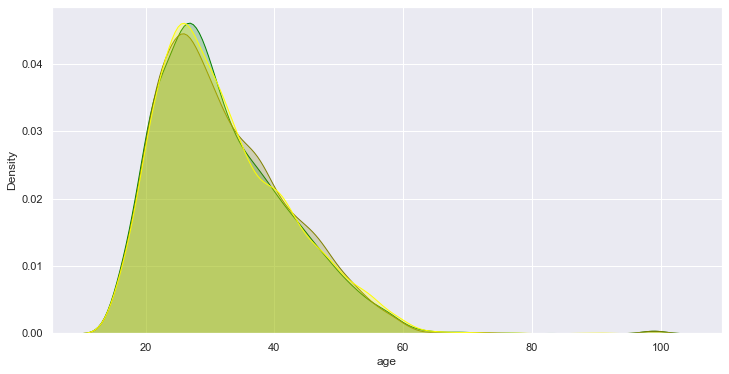

In [19]:
# set age  
sns.set(style="darkgrid")

fig = sns.kdeplot(u_test['age'], shade=True, color="green")
fig = sns.kdeplot(u_control_1['age'], shade=True, color="olive")
fig = sns.kdeplot(u_control_2['age'], shade=True, color="yellow")

plt.show()

In [20]:
#how many users have coins
users.query('coins>0').shape

(170, 16)

In [21]:
#how many users with couns in different groups
users.query('coins>0').groupby('group').agg({'uid':'count'})

,uid
group,
control_1,60
control_2,61
test,49


### Gender check

In [22]:
#what kind of gender we have
gender_amount=users.groupby(['gender'], as_index=False)\
                   .agg({'uid':'count'})\
                   .rename(columns={'uid':'amount'})

gender_amount['%']=round(gender_amount.amount/gender_amount.amount.sum(), 2).mul(100)
gender_amount

,gender,amount,%
0,0,579,4.0
1,1,12333,96.0


### Was premium

In [23]:
#how many users were premium in different groups
was_premium_in_group=users.groupby(['group', 'was_premium'], as_index=False)\
                          .agg({'uid':'count'})\
                          .rename(columns={'uid':'amount'})
was_premium_in_group['%']=round(was_premium_in_group.amount/was_premium_in_group.amount.sum(), 2).mul(100)
was_premium_in_group

,group,was_premium,amount,%
0,control_1,0,3904,30.0
1,control_1,1,436,3.0
2,control_2,0,3853,30.0
3,control_2,1,411,3.0
4,test,0,3900,30.0
5,test,1,408,3.0


### Is premium

In [24]:
#how many users were premium
is_premium_in_group=users.groupby(['group', 'is_premium'], as_index=False)\
                         .agg({'uid':'count'})\
                         .rename(columns={'uid':'amount'})
is_premium_in_group['%']=round(is_premium_in_group.amount/is_premium_in_group.amount.sum(), 2).mul(100)
is_premium_in_group

,group,is_premium,amount,%
0,control_1,0,4148,32.0
1,control_1,1,192,1.0
2,control_2,0,4073,32.0
3,control_2,1,191,1.0
4,test,0,4151,32.0
5,test,1,157,1.0


### Total revenue

<AxesSubplot:xlabel='total_revenue', ylabel='group'>

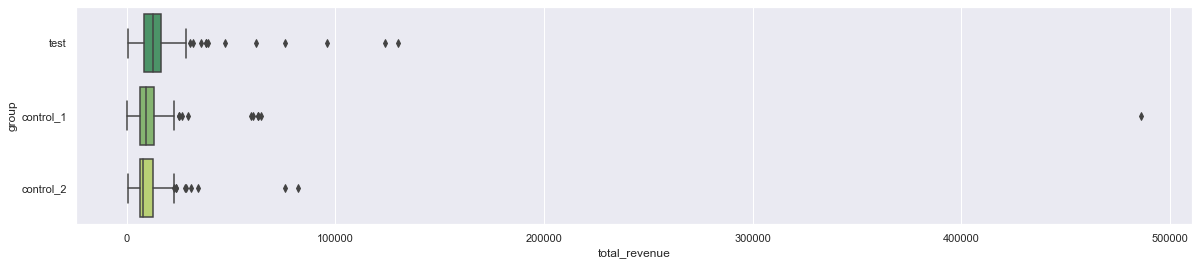

In [25]:
#let's check do we have any insight from revenue
sns.set(rc={'figure.figsize':(20,4)})
sns.boxplot( x="total_revenue", y="group", data=users.query('total_revenue > 0'), palette="summer")

In [26]:
#choose outsider 
users.query('group=="control_1"').agg({'total_revenue':'max'})

total_revenue    486330
dtype: int64

In [27]:
#look at this outsider, check uid
users.query('total_revenue==486330')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,duration_of_using,days_of_using
5735,892333905,22,175,3608.0,Italy,"1,2,3,4,5,6,7,15",1,19,25,575,1,1,486330,control_1,15,8.0


In [28]:
#delete outsider max revenue, don't forget to check in transactions this user
users = users.drop(labels = [5735],axis = 0) 

In [29]:
#check transactions of ousider user, seems like he had a trouble with payment
transactions.query('uid==892333905')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
272,892333905.0,Italy,2017-01-11 03:07:00,2017-10-11 09:05:00,12610.0,19.0,gifts,coins,control_1
279,892333905.0,Italy,2017-10-22 14:20:00,2017-10-29 16:41:00,3783.0,67.0,menu,other_type,control_1
294,892333905.0,Italy,2017-10-18 07:20:00,2017-10-19 04:23:00,3783.0,67.0,empty_admins,other_type,control_1
309,892333905.0,Italy,2017-01-11 03:07:00,2017-10-11 09:08:00,3783.0,67.0,empty_admins,other_type,control_1
313,892333905.0,Italy,2017-10-30 13:47:00,2017-06-11 17:31:00,3783.0,67.0,menu,other_type,control_1
315,892333905.0,Italy,2017-10-21 08:22:00,2017-10-25 11:11:00,3783.0,67.0,menu,other_type,control_1
329,892333905.0,Italy,2017-05-11 13:42:00,2017-05-11 14:02:00,31525.0,19.0,menu,coins,control_1
342,892333905.0,Italy,2017-10-29 08:03:00,2017-11-11 12:48:00,31525.0,19.0,fans,coins,control_1
354,892333905.0,Italy,2017-10-30 05:59:00,2017-10-31 05:55:00,3783.0,67.0,empty_admins,other_type,control_1
392,892333905.0,Italy,2017-10-21 14:19:00,2017-10-21 14:21:00,19773.0,146.0,menu,coins,control_1


In [30]:
transactions.drop(labels=[272, 279, 294, 309, 314, 328, 341, 389, 400, 406, 429, 512, 542, 549, 555, 563, 582, 604], axis=0)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
0,891345942.0,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909.0,147.0,trial_vip_popup,trial_premium,test
1,892054251.0,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923.0,147.0,trial_vip_popup,trial_premium,test
2,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783.0,67.0,menu,other_type,test
3,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783.0,67.0,menu,other_type,test
4,892168170.0,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087.0,147.0,trial_vip_popup,trial_premium,test
...,...,...,...,...,...,...,...,...,...
958,891985866.0,Belgium,NaT,NaT,16640.0,147.0,trial_vip_popup,trial_premium,control_2
959,891491145.0,United States of America,NaT,NaT,12727.0,147.0,send_message,trial_premium,control_2
960,892053750.0,United States of America,NaT,NaT,1261.0,19.0,autorefill,coins,control_2
961,891668253.0,Chile,NaT,NaT,9997.0,147.0,trial_vip_popup,trial_premium,control_2


In [31]:
df_mean=users.groupby(['group', 'is_premium', 'was_premium'], as_index=False)\
                    .agg({'total_revenue':'mean'})\
                    .rename(columns={'total_revenue':'mean_revenue'})
df_mean['%_mean']=round(df_mean.mean_revenue/df_mean.mean_revenue.sum(), 2).mul(100)

df_median=users.groupby(['group', 'is_premium', 'was_premium'], as_index=False)\
               .agg({'total_revenue':'median'})\
               .rename(columns={'total_revenue':'median_revenue'})
df_median['%_median']=round(df_median.median_revenue/df_median.median_revenue.sum(), 2).mul(100)
df_median_mean=pd.merge(df_median, df_mean, on=['group', 'is_premium', 'was_premium'])
df_median_mean

,group,is_premium,was_premium,median_revenue,%_median,mean_revenue,%_mean
0,control_1,0,0,0.0,0.0,32.693135,0.0
1,control_1,0,1,0.0,0.0,513.553279,2.0
2,control_1,1,1,9087.0,32.0,9643.958115,28.0
3,control_2,0,0,0.0,0.0,10.364910,0.0
4,control_2,0,1,0.0,0.0,744.368182,2.0
5,control_2,1,1,6500.0,23.0,8988.172775,26.0
6,test,0,0,0.0,0.0,3.170000,0.0
7,test,0,1,0.0,0.0,628.713147,2.0
8,test,1,1,12597.0,45.0,13571.006369,40.0


In [32]:
total_revenue_per_sum_group=users.groupby(['group', 'is_premium', 'was_premium'], as_index=False)\
                                     .agg({'total_revenue':'sum'})
total_revenue_per_sum_group

,group,is_premium,was_premium,total_revenue
0,control_1,0,0,127634
1,control_1,0,1,125307
2,control_1,1,1,1841996
3,control_2,0,0,39936
4,control_2,0,1,163761
5,control_2,1,1,1716741
6,test,0,0,12363
7,test,0,1,157807
8,test,1,1,2130648


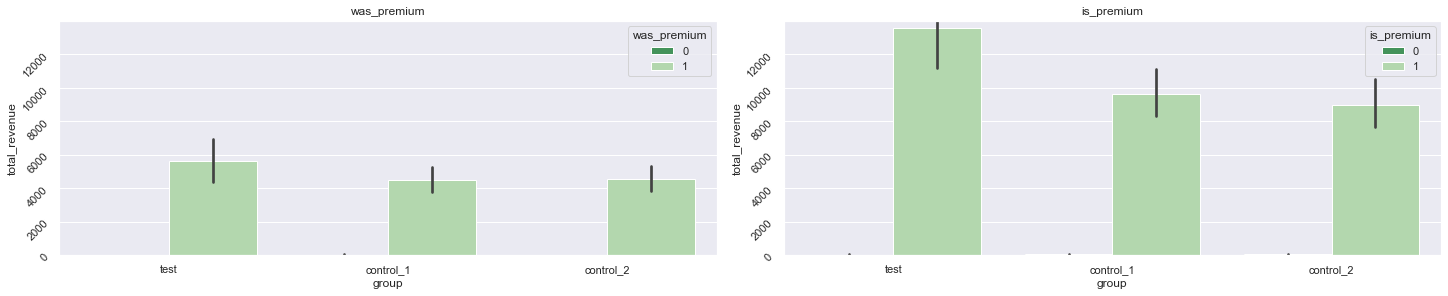

In [33]:
fig, ax = plt.subplots(1, 2, constrained_layout = True)
ticks = [0, 2000, 4000, 6000, 8000, 10000, 12000]
sns.set(rc={'figure.figsize':(20,6)})

sns.barplot(y = 'total_revenue', x = 'group', hue='was_premium', data = users, palette='Greens_r',  ax=ax[0])
ax[0].tick_params(axis='y', rotation=45)
ax[0].set_title('was_premium')
ax[0].set_yticks(ticks)
ax[0].set_ylim(0, 14000)

sns.barplot(y = 'total_revenue', x = 'group', hue='is_premium', data = users, palette='Greens_r', ax=ax[1])
ax[1].tick_params(axis='y', rotation=45)
ax[1].set_title('is_premium')
ax[1].set_yticks(ticks)
ax[1].set_ylim(0, 14000)

plt.show()

### Duration of using and days of using 

<AxesSubplot:xlabel='duration_of_using', ylabel='group'>

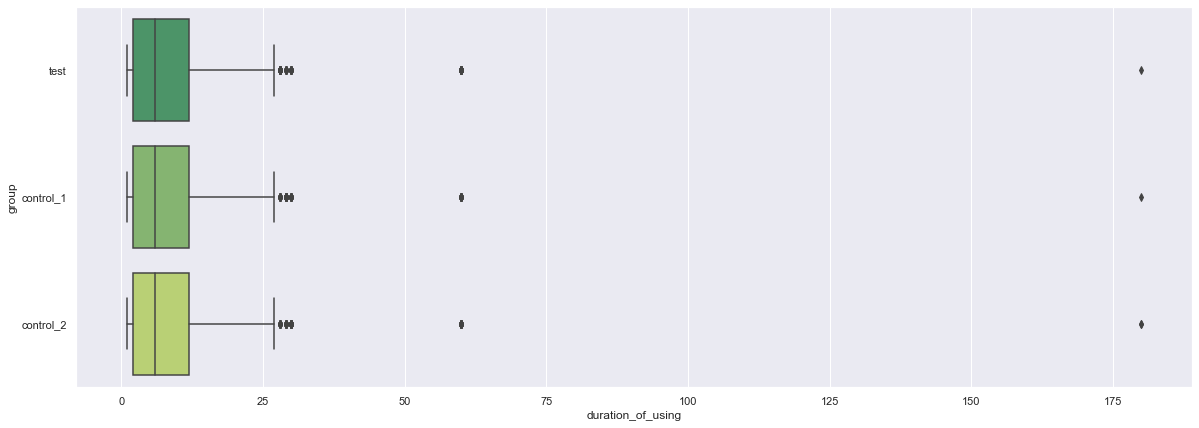

In [34]:
#check outsiders and some insights in dates
#let's check do we have any insight from revenue
sns.set(rc={'figure.figsize':(20,7)})
sns.boxplot( x="duration_of_using", y="group", data=users.query('days_of_using> 0'), palette="summer")

<AxesSubplot:xlabel='duration_of_using', ylabel='group'>

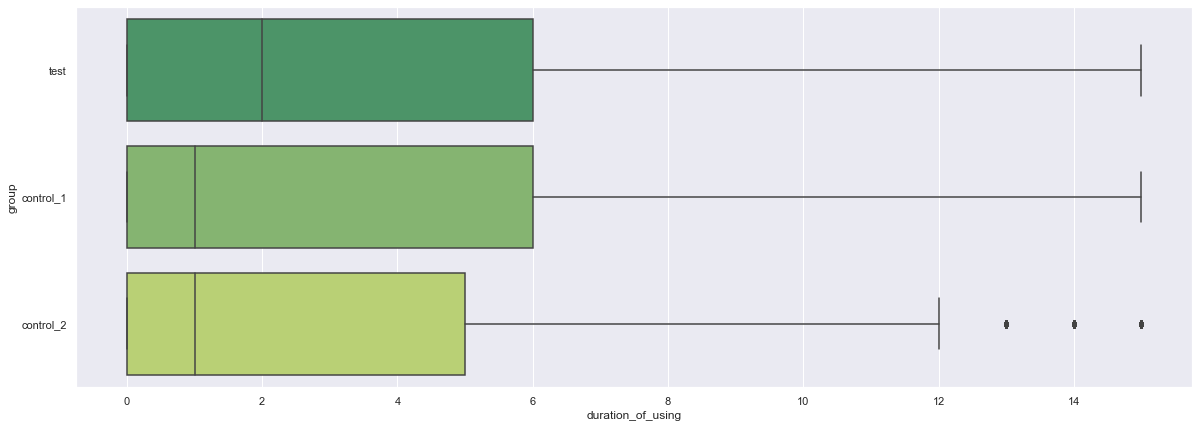

In [35]:
#check outsiders and some insights in dates
#let's check do we have any insight from revenue
sns.set(rc={'figure.figsize':(20,7)})
sns.boxplot( x="duration_of_using", y="group", data=users.query('duration_of_using<16'), palette="summer")

<AxesSubplot:xlabel='days_of_using', ylabel='group'>

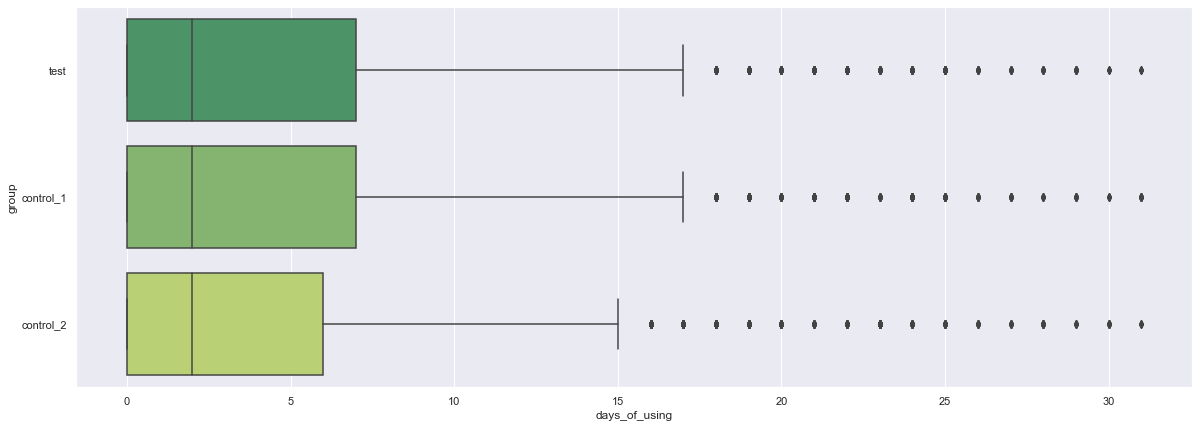

In [36]:
#check outsiders and some insights in dates
#let's check do we have any insight from revenue
sns.set(rc={'figure.figsize':(20,7)})
sns.boxplot( x="days_of_using", y="group", data=users, palette="summer")

In [37]:
# let's check how long people use application
users.query('duration_of_using>30').count()

uid                  76
age                  76
attraction_coeff     76
coins                76
country              76
visit_days           76
gender               76
age_filter_start     76
age_filter_end       76
views_count          76
was_premium          76
is_premium           76
total_revenue        76
group                76
duration_of_using    76
days_of_using        76
dtype: int64

In [38]:
#check amount of activated users
users_no_use=users.query('duration_of_using==0').groupby('group', as_index=False)\
                  .uid.nunique()\
                  .rename(columns={'uid':'not_activated'})
users_total=users.groupby('group', as_index=False)\
                 .uid.nunique()\
                 .rename(columns={'uid':'activated'})
users_activated=pd.merge(users_no_use, users_total, on='group')
users_activated['%_not_activated_to_all']= round(users_activated.not_activated/(users_activated.not_activated+users_activated.activated), 2).mul(100)
users_activated

,group,not_activated,activated,%_not_activated_to_all
0,control_1,1324,4339,23.0
1,control_2,1364,4264,24.0
2,test,1330,4308,24.0


In [39]:
#let's check common info about transactions
transactions.describe(include='all', datetime_is_numeric=True)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
count,9.620000e+02,962,812,812,962.000000,962.000000,962,962,963
unique,NaN,23,NaN,NaN,NaN,NaN,28,4,3
top,NaN,United States of America,NaN,NaN,NaN,NaN,empty_likes,coins,control_1
freq,NaN,300,NaN,NaN,NaN,NaN,265,366,370
mean,8.920301e+08,NaN,2017-09-05 08:06:11.674876928,2017-09-05 14:46:20.541871616,6987.824324,95.637214,NaN,NaN,NaN
min,8.910681e+08,NaN,2017-01-11 03:07:00,2017-01-11 04:37:00,26.000000,0.000000,NaN,NaN,NaN
25%,8.914699e+08,NaN,2017-08-11 03:54:00,2017-07-11 21:13:15,2678.000000,19.000000,NaN,NaN,NaN
50%,8.918616e+08,NaN,2017-10-18 19:57:00,2017-10-22 16:23:00,6240.000000,146.000000,NaN,NaN,NaN
75%,8.921398e+08,NaN,2017-10-23 13:08:00,2017-10-29 07:48:00,9087.000000,147.000000,NaN,NaN,NaN
max,9.609370e+08,NaN,2017-10-31 23:40:00,2017-12-11 22:06:00,113477.000000,147.000000,NaN,NaN,NaN


In [40]:
#check dates with mistakes, we expect you can not join after payment
transactions.query('joined_at > paid_at').shape

(141, 9)

In [41]:
#check dates of first join and first payment 
transactions.groupby(['group'], as_index=False).agg(min_joined_at=('joined_at', 'min'), 
                                                    max_joined_at=('joined_at', 'max'),
                                                    min_paid_at=('paid_at', 'min'), 
                                                    max_paid_at=('paid_at', 'max'))

,group,min_joined_at,max_joined_at,min_paid_at,max_paid_at
0,control_1,2017-01-11 03:07:00,2017-10-31 23:40:00,2017-01-11 04:37:00,2017-12-11 22:06:00
1,control_2,2017-01-11 03:07:00,2017-10-31 23:40:00,2017-01-11 04:37:00,2017-12-11 22:06:00
2,test,2017-01-11 03:07:00,2017-10-31 23:40:00,2017-01-11 04:37:00,2017-12-11 22:06:00


In [42]:
transactions.query('joined_at<"2017-10-01 00:00:00"').groupby(['joined_at'], as_index=False)\
            .agg({'uid':'count'})

,joined_at,uid
0,2017-01-11 03:07:00,6
1,2017-01-11 06:46:00,3
2,2017-01-11 12:50:00,3
3,2017-01-11 19:07:00,3
4,2017-02-11 09:46:00,14
5,2017-02-11 14:14:00,3
6,2017-02-11 14:25:00,3
7,2017-02-11 15:33:00,3
8,2017-02-11 23:29:00,3
9,2017-03-11 16:33:00,3


In [43]:
transactions.groupby(['paid_at'], as_index=False)\
            .agg({'uid':'count'}).tail(30)

,paid_at,uid
228,2017-11-11 20:13:00,3
229,2017-11-11 20:38:00,3
230,2017-11-11 21:35:00,3
231,2017-11-11 23:51:00,3
232,2017-11-13 00:52:00,3
233,2017-11-13 03:42:00,3
234,2017-11-13 03:46:00,3
235,2017-11-13 05:58:00,3
236,2017-11-13 11:21:00,3
237,2017-11-13 15:04:00,3


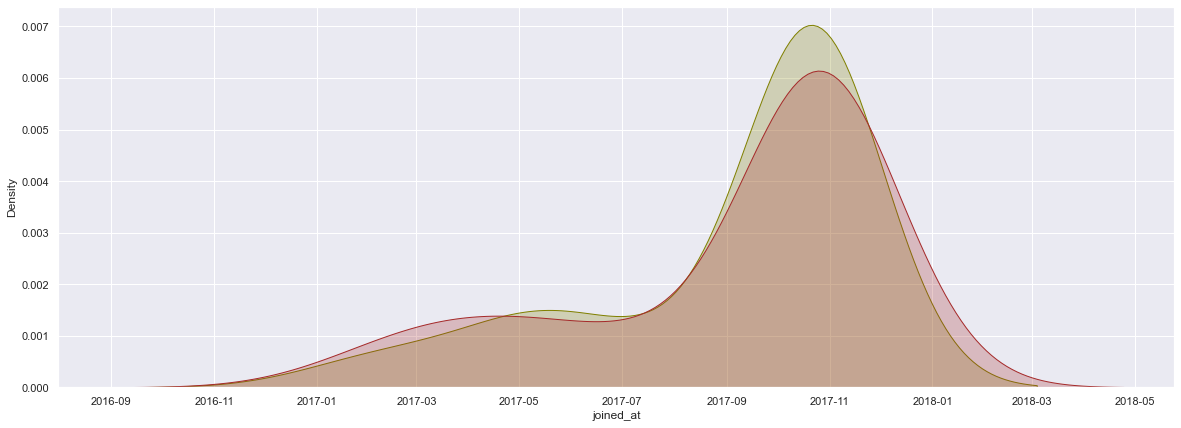

In [44]:
#let's see visualisation of amount of joins and payments depends on dates
sns.set(style="darkgrid")
sns.kdeplot(transactions['joined_at'], shade=True, bw_method=0.5, color="olive")
sns.kdeplot(transactions['paid_at'], shade=True, bw_method=0.5, color="brown")
plt.show()

#### Check revenue 

In [45]:
#lets'see amount of unique users with total_revenue>0
users.query('total_revenue>0').shape

(524, 16)

In [46]:
dfdfdf=transactions.groupby('uid', as_index=False).agg({'revenue':'sum'})
dfdfdf.uid.nunique()

526

In [47]:
ad=pd.merge(dfdfdf, users.query('total_revenue>0'), on='uid', how='left')

In [48]:
ad.query('total_revenue!=revenue')

,uid,revenue,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,duration_of_using,days_of_using
47,891252072.0,7553.0,43.0,326.0,0.0,Argentina,"1,2,3,4,5,6,7,8,9",1,40.0,46.0,98.0,1.0,1.0,8814.0,control_1,9.0,9.0
114,891367521.0,19006.0,25.0,129.0,1.0,Italy,"1,2,3,5,6,7,8",1,16.0,99.0,62.0,1.0,0.0,20462.0,control_1,8.0,7.0
155,891508155.0,9165.0,34.0,101.0,1.0,Latvia,"1,2,3,4,5,6,7,8,9,10,11,12,13",1,20.0,32.0,226.0,1.0,1.0,10101.0,test,13.0,13.0
353,892045743.0,8814.0,26.0,220.0,6.0,Israel,"1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,18,20,22,2...",1,23.0,29.0,59.0,1.0,1.0,10075.0,control_2,24.0,20.0
356,892050108.0,15119.0,51.0,239.0,6.0,Israel,"1,2,3,4,5,6,7,9",1,37.0,42.0,364.0,1.0,1.0,16380.0,test,9.0,8.0
393,892102893.0,18915.0,31.0,550.0,40.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11",1,28.0,34.0,138.0,0.0,0.0,25220.0,control_1,11.0,11.0
434,892202526.0,1794.0,21.0,491.0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,2...",1,18.0,35.0,59.0,1.0,0.0,2691.0,test,28.0,26.0
452,892236423.0,86996.0,23.0,262.0,378.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,19.0,23.0,1326.0,1.0,1.0,95823.0,test,28.0,28.0
465,892275462.0,58968.0,31.0,310.0,0.0,France,"1,2,3,4,5,9,13,15,16",1,36.0,68.0,58.0,1.0,1.0,14885.0,test,16.0,9.0
483,892333905.0,360230.0,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#lets'see amount of unique users with revenue>0, looks like in transactions data we have 2 extra users
df_trans=transactions.query('uid!=892355163 and uid!=892333905')

In [50]:
df_trans.uid.nunique()

524

In [51]:
#and also we have more total revenue in transactions to compare with users data
df_trans.revenue.sum()

6331793.0

In [52]:
users.total_revenue.sum()

6316193

In [53]:
#and check again total revenue and it is still more than in users data
transactions_with_total=df_trans.groupby('uid', as_index=False).agg({'revenue':'sum'})\
                                .rename(columns={'revenue':'total_revenue_trans'})
transactions_with_total.total_revenue_trans.sum()

6331793.0

In [54]:
df=users.merge(transactions_with_total, on=['uid'], how='left')
df=df.fillna(0)

In [55]:
df['diff']=df.total_revenue_trans-df.total_revenue

In [56]:
#find where we have difference in total_revenue, we see that in transactions we have more revenue of 2 users.
df.query('diff!=0')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,duration_of_using,days_of_using,total_revenue_trans,diff
406,892236423,23,262,378.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,19,23,1326,1,1,95823,test,28,28.0,86996.0,-8827.0
761,891508155,34,101,1.0,Latvia,"1,2,3,4,5,6,7,8,9,10,11,12,13",1,20,32,226,1,1,10101,test,13,13.0,9165.0,-936.0
1736,892050108,51,239,6.0,Israel,"1,2,3,4,5,6,7,9",1,37,42,364,1,1,16380,test,9,8.0,15119.0,-1261.0
1900,892339626,37,684,0.0,United States of America,"1,2,3,4,5,9,10,11,12,14,15,16,17,18,19,20,21,2...",1,18,40,263,1,1,17758,test,30,25.0,17004.0,-754.0
2070,892275462,31,310,0.0,France,"1,2,3,4,5,9,13,15,16",1,36,68,58,1,1,14885,test,16,9.0,58968.0,44083.0
2630,892202526,21,491,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,2...",1,18,35,59,1,0,2691,test,28,26.0,1794.0,-897.0
4567,891367521,25,129,1.0,Italy,"1,2,3,5,6,7,8",1,16,99,62,1,0,20462,control_1,8,7.0,19006.0,-1456.0
4818,960936960,30,4,99958.0,Russian Federation,"1,2,3,4,7,8,9,10,11,14,15,16,17,18,21,22,23,24...",1,26,62,4262,1,1,26,control_1,180,27.0,806.0,780.0
6122,892366260,26,215,20.0,United Kingdom (Great Britain),"1,2,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20...",1,23,29,195,1,1,63024,control_1,28,24.0,56719.0,-6305.0
6768,891252072,43,326,0.0,Argentina,"1,2,3,4,5,6,7,8,9",1,40,46,98,1,1,8814,control_1,9,9.0,7553.0,-1261.0


In [57]:
uid!=892045743 and uid!=892102893 and uid!=891252072 and uid!=892366260 and uid!=960936960 and uid!=891367521 and uid!=892202526 and uid!=892275462 and uid!=892339626 and uid!=892050108 and uid!=891508155 and uid!=892236423

NameError: name 'uid' is not defined

In [58]:
#finaly we choose users which we have the same amount of revenue in users and transactions
df_users=users.query('uid!=892045743 and uid!=892102893 and uid!=891252072 and uid!=892366260 and uid!=960936960 and uid!=891367521 and uid!=892202526 and uid!=892275462 and uid!=892339626 and uid!=892050108 and uid!=891508155 and uid!=892236423')
df_users.total_revenue.sum()

6030934

In [59]:
df_transactions=df_trans.query('uid!=892045743 and uid!=892102893 and uid!=891252072 and uid!=892366260 and uid!=960936960 and uid!=891367521 and uid!=892202526 and uid!=892275462 and uid!=892339626 and uid!=892050108 and uid!=891508155 and uid!=892236423')
df_transactions.revenue.sum()

6030934.0

In [60]:
df_users['purchase']=df_users.total_revenue.apply(lambda x: 0 if x==0 else 1)# 0 - no purchase, 1 - did any purhcase
df_users

/var/folders/p1/qvc7y2xx4gqb1vfnk2ng04l40000gp/T/ipykernel_15591/4017973049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users['purchase']=df_users.total_revenue.apply(lambda x: 0 if x==0 else 1)# 0 - no purchase, 1 - did any purhcase


,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,duration_of_using,days_of_using,purchase
0,892309896,27,685,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,0,0,0,test,17,14.0,0
1,892044516,27,0,0.0,Germany,0,1,24,30,0,0,0,0,test,0,0.0,0
2,892185708,45,44,0.0,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,0,0,0,test,26,20.0,0
3,892130292,32,0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,0,0,0,test,12,12.0,0
4,891406035,27,1000,0.0,France,0,1,24,30,1,1,0,0,test,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12907,891937401,63,242,0.0,Italy,"1,2",1,50,66,33,0,0,0,control_2,2,2.0,0
12908,891692844,35,500,0.0,France,"1,2,3,4,5,6,8,9,10,11,12,14,16",1,24,45,2,0,0,0,control_2,16,13.0,0
12909,891096429,41,333,0.0,United States of America,0,1,38,44,6,0,0,0,control_2,0,0.0,0
12910,891697584,48,210,0.0,United Kingdom (Great Britain),"2,3,5,7,9,10,12,14,15",1,45,51,19,0,0,0,control_2,15,9.0,0


In [61]:
#just check did't we delete premium_no_trail, no we still have them almoust at the same amount
df_transactions.query('product_type=="premium_no_trial"')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
5,892426491.0,United States of America,2017-10-14 10:13:00,2017-10-15 22:39:00,12597.0,147.0,autoreply_message,premium_no_trial,test
6,891558921.0,United States of America,2017-01-11 03:07:00,2017-10-11 09:05:00,9100.0,147.0,left_sidebar_menu,premium_no_trial,test
11,891861048.0,Canada,2017-10-26 02:55:00,2017-10-11 19:00:00,3588.0,68.0,none,premium_no_trial,test
12,891178380.0,Spain,2017-08-11 03:54:00,2017-09-11 21:53:00,113477.0,147.0,promo_09,premium_no_trial,test
21,891312873.0,Italy,2017-05-11 21:22:00,2017-10-11 21:51:00,7852.0,147.0,promo_09,premium_no_trial,test
...,...,...,...,...,...,...,...,...,...
952,891393735.0,Spain,NaT,NaT,6292.0,147.0,dating,premium_no_trial,control_2
953,892053750.0,United States of America,NaT,NaT,6292.0,147.0,autoreply_message,premium_no_trial,control_2
956,892032072.0,United Kingdom (Great Britain),NaT,NaT,3588.0,68.0,none,premium_no_trial,control_2
957,891435993.0,Canada,NaT,NaT,3549.0,68.0,none,premium_no_trial,control_2


##### 1.4. Our insights about usets data / Выводы о данных:

Important:
- we removed duplicates
- we removed 2 extra users that were in transaction info but weren't in users with total_revenue>0 in transactions

We have data on 12,912 unique users:
- Age/Age: The average age of users is 32 years old, 75% of users are under 38 years old.
- Attraction_coeff / Attractiveness coefficient: 315 out of 1000 on average.
- Coins: The average number of coins users have is 9, while the highest number of coins is 99,958. Only 170 users have coins.
- Country: We have users from 72 countries, with the largest number coming from the United States of America.
- Visit_days: We translated the days of visiting the application into duration_of_using, where we see the duration of use by the application (what was the last day of the call), as well as the number of days of use by the application days_of_using, where we see how many days users visited the application. 76 users used the application for more than a month (we need to check the data, what does this mean), 4018 users did not enter the application at all, despite registration. 
- Gender: We have two genders. But with this in the ratio of 96% vs 4%.
- Skip search filters by age, as well as views.
- Was_premium and is_premium are approximately equally represented in the samples. A small part of our users have purchased and continue to purchase a premium subscription.
- Total_revenue: we found an outlier in user 892333905 in total_revenue 486 330, looked at his transactions and deleted them, because the transactions look like a bug in the payment system. Based on the median and mean values ​​of total_revenue in the control_1, control_2 and test groups, it shows both absolute and relative increase in total_revenue. We also have a mismatch between total revenue in the user tables and revenue in the transaction tables. We will focus on transactions in the transaction table.

Important: calculate ARPU, ARPPU, CR
- Duration_of_using and days_of_using: according to 4018 users, they did not open the application during the experiment, that is, they most likely did not activate it, 76 users have bugs in the description, since they have a duration of more than 1 month, about 60 and 180 days.

Important: We see that there are either outliers in the data, or some dates are incorrectly recorded, while we see the maximum period of 31 days (the maximum day of entry after registration) by the number of duration of use of the application. We have the registration 2017-01-11 03:07:00 and 2017-10-31 23:40:00, as well as the vast majority of the data in joined_at and paid_at where the day is indicated as the number 11, but the month and time spill out. We will consider in this case that this is still a bug in the data recording. Therefore, it will use all data on transactions, assuming that they were all made in November. 

# 2. We identified the key metrics that we are interested in.

- ARPU (Average revenue per user) or "average revenue per user".

- ARPPU (Average Revenue Per Paying User): since a small proportion of our sample of users make in-app purchases, it is reasonable to check for changes in the behavior of paying users.

- Conversion rate: Since the cost of a premium subscription* has been changed when buying through two new payment systems, it is important to understand whether the innovation affected the number of premium subscription purchases or not, that is, the Conversion rate. Conversion to paying user.
By conversion, we will also check the change in behavior for different subgroups of the audience, since a change in the cost of a subscription may affect the refusal to purchase a premium subscription at a new higher price.

#### ARPU_total

In [64]:
ARPU_total=df_users.groupby(['group'], as_index=False)\
                   .agg({'total_revenue':'mean'})\
                   .rename(columns={'revenue':'ARPU'})
ARPU_total

,group,total_revenue
0,control_1,456.250808
1,control_2,448.126437
2,test,498.182241


In [65]:
users

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,duration_of_using,days_of_using
0,892309896,27,685,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,0,0,0,test,17,14.0
1,892044516,27,0,0.0,Germany,0,1,24,30,0,0,0,0,test,0,0.0
2,892185708,45,44,0.0,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,0,0,0,test,26,20.0
3,892130292,32,0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,0,0,0,test,12,12.0
4,891406035,27,1000,0.0,France,0,1,24,30,1,1,0,0,test,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12907,891937401,63,242,0.0,Italy,"1,2",1,50,66,33,0,0,0,control_2,2,2.0
12908,891692844,35,500,0.0,France,"1,2,3,4,5,6,8,9,10,11,12,14,16",1,24,45,2,0,0,0,control_2,16,13.0
12909,891096429,41,333,0.0,United States of America,0,1,38,44,6,0,0,0,control_2,0,0.0
12910,891697584,48,210,0.0,United Kingdom (Great Britain),"2,3,5,7,9,10,12,14,15",1,45,51,19,0,0,0,control_2,15,9.0


#### ARPU_is_premium

In [66]:
ARPU_is_premium=df_users.query('is_premium==1')\
                        .groupby('group', as_index=False)\
                        .agg({'total_revenue':'mean'})\
                        .rename(columns={'total_revenue':'ARPU_is_premium'})
ARPU_is_premium

,group,ARPU_is_premium
0,control_1,9415.595745
1,control_2,8982.452632
2,test,12998.032895


#### ARPPU

In [67]:
ARPPU=df_users.query('total_revenue>0').groupby(['group'], as_index=False)\
              .agg({'total_revenue':'mean'})\
              .rename(columns={'total_revenue':'ARPPU'}) 
ARPPU

,group,ARPPU
0,control_1,10631.134409
1,control_2,10270.768817
2,test,15308.428571


#### ARPPU_is_premium_not_trail

In [68]:
ARPPU_is_premium=df_users.query('is_premium==1 and total_revenue>0').groupby(['group'], as_index=False)\
                         .agg({'total_revenue':'mean'})\
                         .rename(columns={'total_revenue':'ARPPU_is_premium'}) 
ARPPU_is_premium

,group,ARPPU_is_premium
0,control_1,11569.490196
1,control_2,11531.527027
2,test,16743.228814


In [64]:
ARPPU_premium_no_trail=df_transactions.query('product_type=="premium_no_trial"')\
                                      .groupby(['group'], as_index=False)\
                                      .agg({'revenue':'mean'})\
                                      .rename(columns={'revenue':'ARPPU_premium_no_trail'}) 
ARPPU_premium_no_trail

,group,ARPPU_premium_no_trail
0,control_1,6836.725490
1,control_2,6967.141509
2,test,11109.800000


#### CR

In [65]:
df_users.groupby('group', as_index=False).agg({'purchase':'mean'}).rename({'purchase':'CR'})

,group,purchase
0,control_1,0.042916
1,control_2,0.043631
2,test,0.032543


# 3. A/A test

#### 3.1. Preparing data for A/A and A/B

In [66]:
#connect users and transactions
df_aa=pd.merge(df_users, df_transactions, how='right', on=['uid', 'group', 'country'])

# calculate revenue for each user
df_revenue_control_1 =  df_aa.query('group=="control_1"').groupby('uid').agg({'revenue': 'sum'})
df_revenue_control_2 =  df_aa.query('group=="control_2"').groupby('uid').agg({'revenue': 'sum'})
df_revenue_test      =  df_aa.query('group=="test"').groupby('uid').agg({'revenue': 'sum'})

df_control_1=df_users.query('group=="control_1"').groupby('uid').agg({'total_revenue': 'sum'})
df_control_2=df_users.query('group=="control_2"').groupby('uid').agg({'total_revenue': 'sum'})

df_aa.shape

(880, 23)

In [67]:
# bootstrap function
def get_bootstrap(
                  data_column_1, # числовые значения первой выборки
                  data_column_2, # числовые значения второй выборки
                  statistic, # интересующая нас статистика
                  draw=False, # нарисовать распределение
                  boot_it = 1000, # количество бутстрэп-подвыборок
                  bootstrap_conf_level = 0.95 # уровень значимости
                  ):
    
    boot_data = []
    
    for i in range(boot_it): # извлекаем подвыборки
        samples_1 = data_column_1 \
                    .sample(len(data_column_1), replace = True) \
                    .values
        
        samples_2 = data_column_2 \
                    .sample(len(data_column_1), replace = True) \
                    .values
        
        # считаем разницу статистик между двумя подвыборками и сохраняем в список
        boot_data.append(statistic(samples_1)-statistic(samples_2)) 
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = ss.norm.cdf(x = 0, 
                         loc = np.mean(boot_data), 
                         scale = np.std(boot_data))
    
    p_2 = ss.norm.cdf(x = 0, 
                         loc = -np.mean(boot_data), 
                         scale = np.std(boot_data))
    
    p_value = min(p_1, p_2) * 2

    # Визуализация
    if draw:
        _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
        for bar in bars:
            if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
                bar.set_facecolor('red')
            else: 
                bar.set_facecolor('grey')
                bar.set_edgecolor('black')

        plt.style.use('ggplot')
        plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
        plt.xlabel('boot_data')
        plt.ylabel('frequency')
        plt.title("Histogram of boot_data")
        plt.show()
    
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

#### 3.2. Distribution of revenue for paying users 

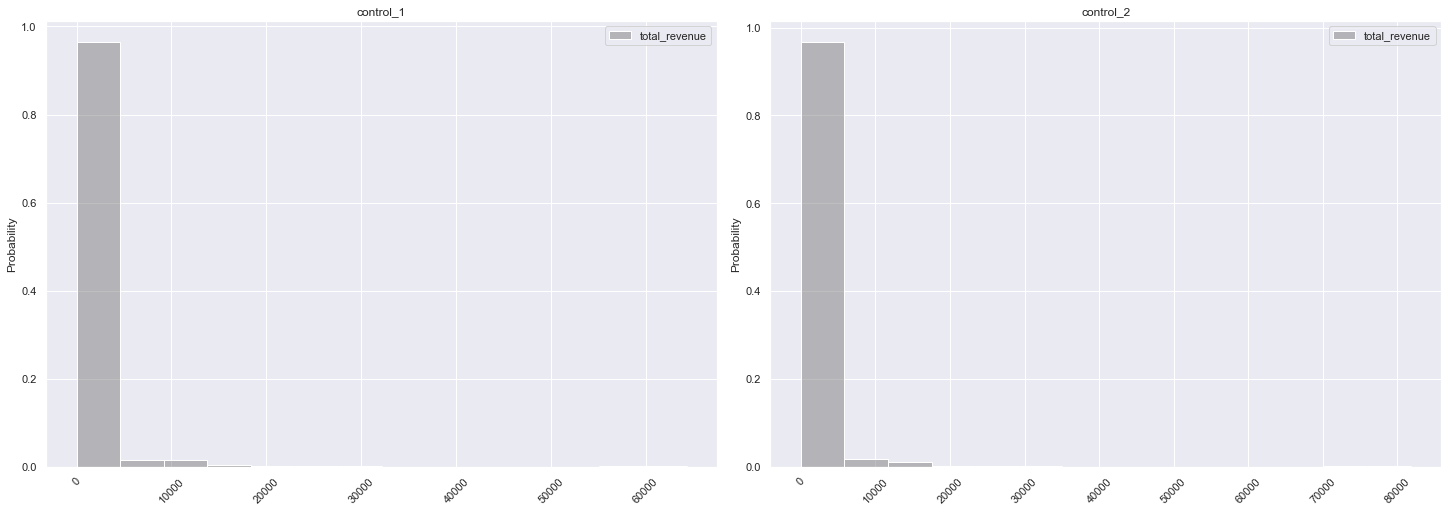

In [68]:
#distributions of total revenue of all users (with any revenue and without). 
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.histplot(df_control_1, stat='probability', ax=ax[0], palette='gray')
ax[0].set_title('control_1')
ax[0].tick_params(axis='x', rotation=45)

sns.histplot(df_control_2, stat='probability', ax=ax[1], palette='gray_r')
ax[1].set_title('control_2')
ax[1].tick_params(axis='x', rotation=45)

plt.show()

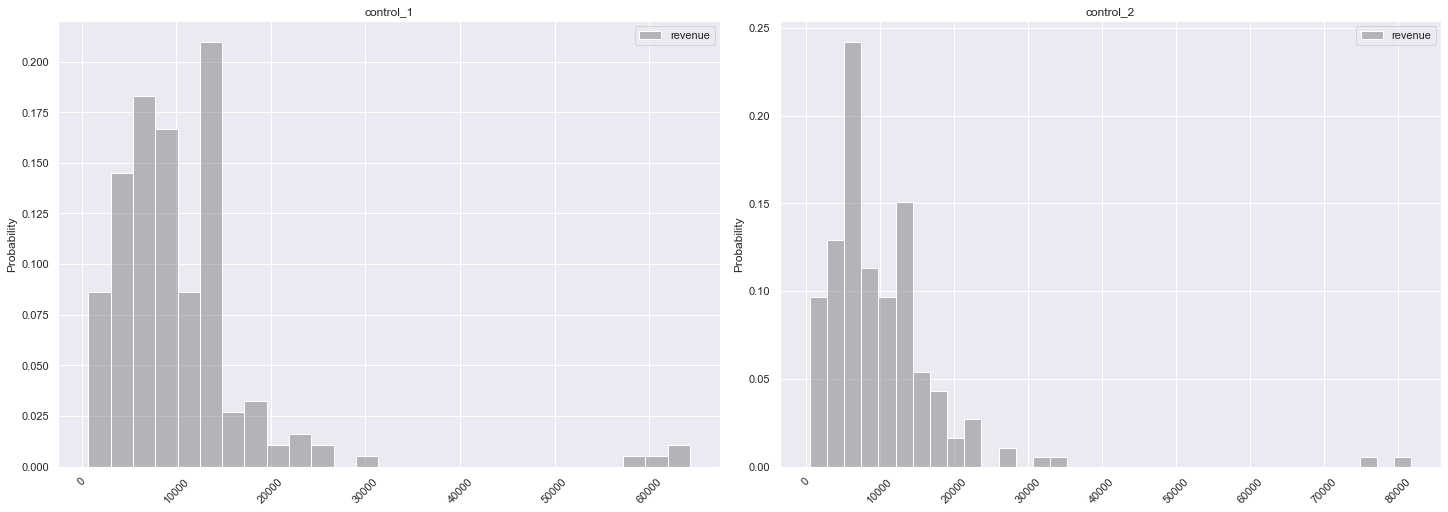

In [69]:
#let's see distribution of revenue of paying users, it gives more understandble picture. 
# and as we see we should use boostrap becouse the distribution is not normal and we have some extra numbers
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.histplot(df_revenue_control_1, stat='probability', ax=ax[0], palette='gray')
ax[0].set_title('control_1')
ax[0].tick_params(axis='x', rotation=45)

sns.histplot(df_revenue_control_2, stat='probability', ax=ax[1], palette='gray_r')
ax[1].set_title('control_2')
ax[1].tick_params(axis='x', rotation=45)

plt.show()

#### The distributions of the control groups are not normal, and we also have strong outliers in the data, in which case we will use BOOTSTRAP to check the correctness of the split and t-test to compare the averages of the two samples.

  0%|          | 0/1000 [00:00<?, ?it/s]

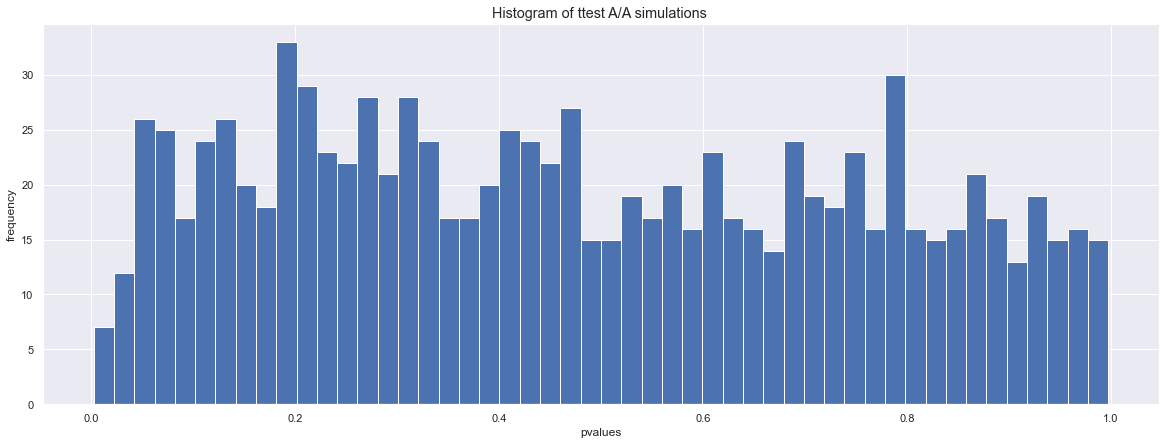

ВНИМАНИЕ: cистема сплитования работает корректно


In [74]:
simulations = 1000 # количество симуляций
sample_size = 30  # размер подвыборки
results = []

# запускаем симуляции A/A теста
for i in tqdm(range(simulations)):
    sample1 = df_revenue_control_1.revenue.sample(sample_size, replace = False)
    sample2 = df_revenue_control_2.revenue.sample(sample_size, replace = False)
    results.append(get_bootstrap(sample1, sample2, statistic=np.mean)['p_value']) # сохраняем pvalue в список

plt.hist(results, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# проверяем, что количество ложноположительных случаев не превышает альфа
if (sum(np.array(results) <0.05) / simulations) < 0.05:
    print('ВНИМАНИЕ: cистема сплитования работает корректно')
else:
    print('ВНИМАНИЕ: проблема в системе сплитования')
    

#### 3.3. Levene, z-test

Проверим равенство дисперий между двумя контрольными группами (чтобы оценить возможность использования параметрических тестов). 
Н0: дисперсии между группами не различаются статистически значимо. 

In [76]:
df_users['cr'] = df_users['is_premium'].apply(lambda x: 1 if x == 1 else 0)

/var/folders/p1/qvc7y2xx4gqb1vfnk2ng04l40000gp/T/ipykernel_15591/1353773246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users['cr'] = df_users['is_premium'].apply(lambda x: 1 if x == 1 else 0)


In [77]:
df_users.cr.mean()

0.04108845646949376

In [77]:
# test Levene about the equality of the variances of two samples
ss.levene(df_users.query('group=="control_1"').cr, df_users.query('group=="control_2"').cr)

LeveneResult(statistic=0.07257906373496673, pvalue=0.78762449203716)

pvalue=0.787 > 0.5 больше критического значения, значит мы не можем отвергнуть нулевую гипотезу,
также мы имеем достаточный размер выборки чтобы использовать параметрические 
тесты для оценки статистической значимости различий средних. Будем использовать для A/B теста z-тест (он более точен для бинарных данных).

#### Н0: средние двух выборок не различаются статистически значимо. Проведем z-test для сравнения средних двух выборок в данном случае, так как данные категориальные.

  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/mariakatz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:746: RuntimeWarning: invalid value encountered in double_scalars
  zstat = (value1 - value2 - diff) / std_diff


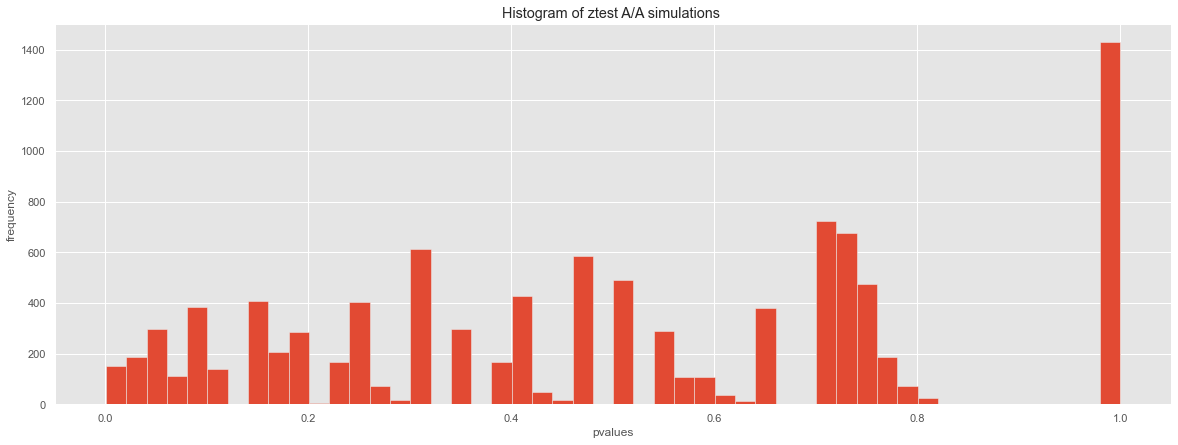

ВНИМАНИЕ: cистема сплитования работает корректно


In [78]:
simulations = 10000 # количество симуляций
sample_size = 100  # размер подвыборки
results = []

# запускаем симуляции A/A теста
for i in tqdm(range(simulations)):
    sample1 = users.query('group=="control_1"').cr.sample(sample_size, replace = False).values
    sample2 = users.query('group=="control_2"').cr.sample(sample_size, replace = False).values
    results.append(ztest(sample1, sample2)[1]) # сохраняем pvalue в список

plt.hist(results, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ztest A/A simulations ")
plt.show()

# проверяем, что количество ложноположительных случаев не превышает альфа
if (sum(np.array(results) <0.05) / simulations) < 0.05:
    print('ВНИМАНИЕ: cистема сплитования работает корректно')
else:
    print('ВНИМАНИЕ: проблема в системе сплитования.')
    

# 4. A/B тест

#### 4.1. let's check the meaning of the statistical significance

In [70]:
# calculate revenue distribution for each test and control
df_control =  df_users.query('group!="test"')
df_test    =  df_users.query('group=="test"')

#### Check ARPU

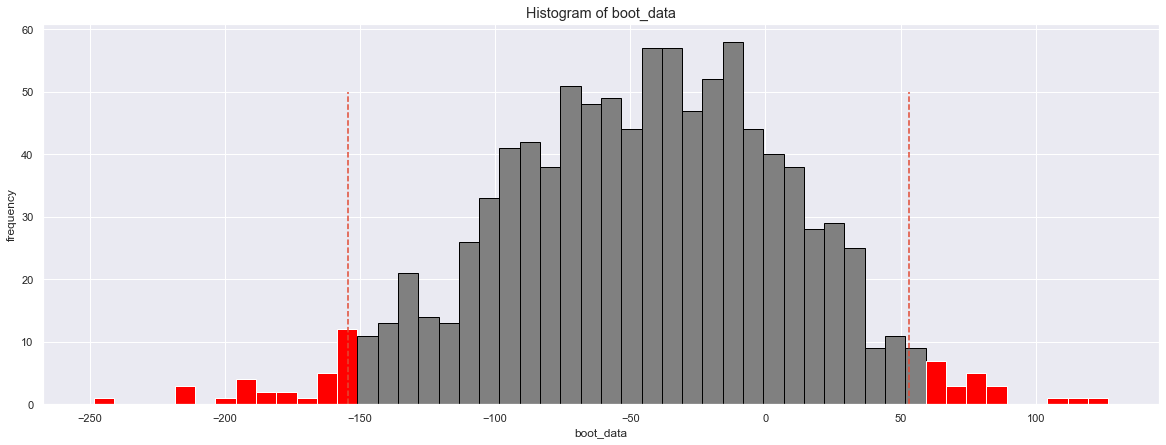

In [71]:
# bootsrap for ARPU
b_arpu = get_bootstrap(df_control.total_revenue, df_test.total_revenue, statistic=np.mean, draw=True)

In [72]:
b_arpu['quants'] 

,0
0.025,-154.284687
0.975,52.994469


In [73]:
b_arpu['p_value'] 

0.40612864506245805

> Результат A/B теста по ARPU: 0 попал в 95% доверительный интервал и p-value > 0.05 => не можем отвергнуть нулевую гипотезу об отсутсвии статистически значимого различия ARPU между тестом и контролем.

#### Check ARPU_is_premium

In [74]:
# calculate revenue distribution for each test and control
df_control_is_premium =  df_users.query('group!="test" and is_premium==1')
df_test_is_premium    =  df_users.query('group=="test" and is_premium==1')

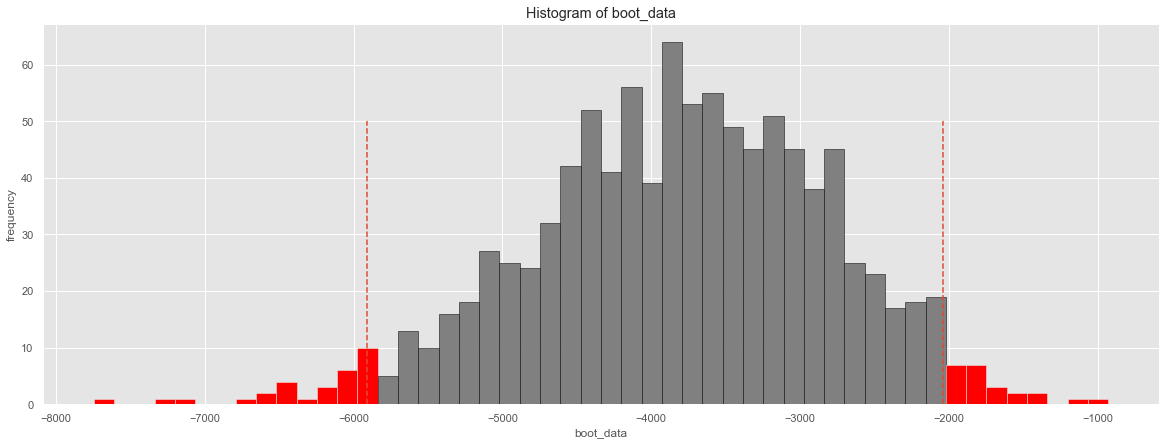

In [83]:
# bootsrap for ARPU is premium
b_arpu_is_premium = get_bootstrap(df_control_is_premium.total_revenue, 
                                   df_test_is_premium.total_revenue, 
                                   statistic=np.mean, draw=True)

In [84]:
b_arpu_is_premium['quants']

,0
0.025,-5911.633929
0.975,-2039.521164


In [85]:
b_arpu_is_premium['p_value']

0.00013486014596468367

>  Результат A/B теста по ARPU is premium: 0 не попал в 95% доверительный интервал и p-value < 0.05 => можем отвергнуть нулевую гипотезу об отсутсвии статистически значимого различия ARPU is premium между тестом и контролем. 

#### Check ARPPU

In [86]:
# calculate revenue distribution for each test and control
df_control_arppu =  df_users.query('group!="test" and total_revenue>0')
df_test_arppu    =  df_users.query('group=="test" and total_revenue>0')

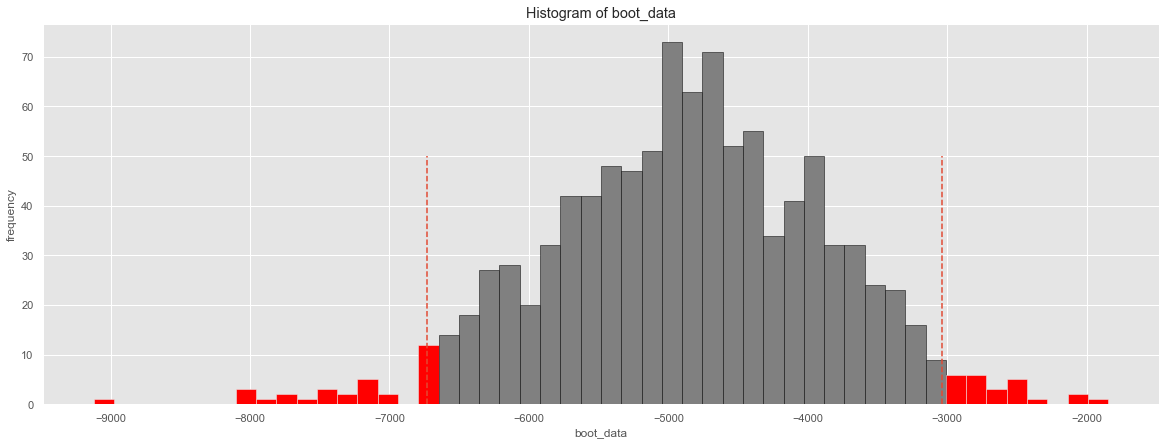

In [87]:
# bootsrap for ARPPU
b_arppu = get_bootstrap(df_control_arppu.total_revenue, 
                         df_test_arppu.total_revenue, 
                         statistic=np.mean, draw=True)

In [88]:
b_arppu['quants']

,0
0.025,-6733.378831
0.975,-3037.008804


In [89]:
b_arppu['p_value']

8.454544115431258e-07

#### Check ARPPU_premium_no trail

In [90]:
# calculate revenue distribution for each test and control
df_control_arppu_nt =  df_transactions.query('group!="test" and product_type=="premium_no_trial"')
df_test_arppu_nt    =  df_transactions.query('group=="test"and product_type=="premium_no_trial"')

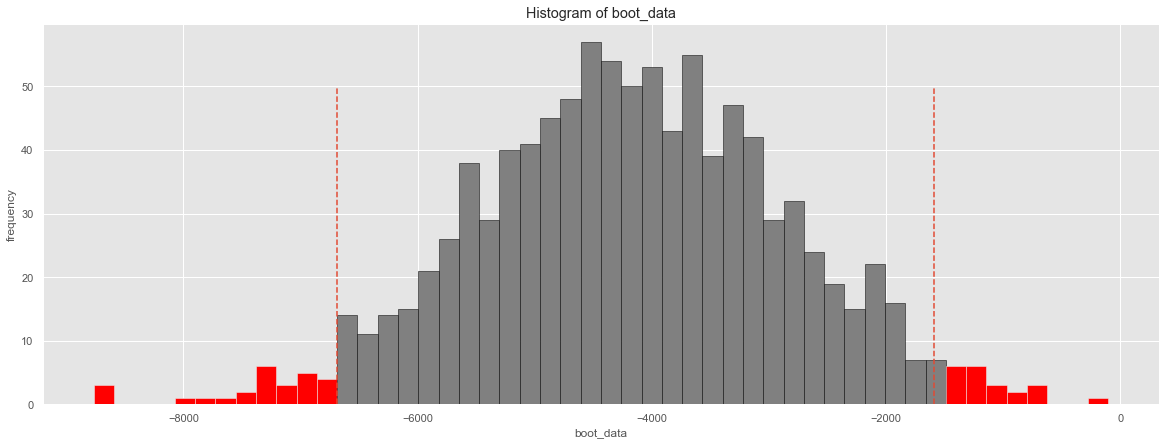

In [91]:
# bootsrap for ARPPU
b_arppu_nt = get_bootstrap(df_control_arppu_nt.revenue, 
                           df_test_arppu_nt.revenue, 
                           statistic=np.mean, draw=True)

In [92]:
b_arppu_nt['quants']

,0
0.025,-6689.38125
0.975,-1591.59375


In [93]:
b_arppu_nt['p_value']

0.0015274417800193781

>  Результат A/B теста по ARPPU no trail: 0 не попал в 95% доверительный интервал и p-value < 0.05 => можем отвергнуть нулевую гипотезу об отсутсвии статистически значимого различия для ARPPU для всех платящих пользователей, для пользователей, которые покупали именно premium_no_trail, так и для всех, кто is_premium. 

In [94]:
df_control_arppu_nt =  df_transactions.query('group!="test" and product_type=="premium_no_trial"')
df_test_arppu_nt    =  df_transactions.query('group=="test"and product_type=="premium_no_trial"')

In [95]:
# changes ARPPU test and control
arppu_changes=round((df_users.query('group=="test" and total_revenue>0').agg({'total_revenue':'mean'})-
                     df_users.query('group!="test" and total_revenue>0').agg({'total_revenue':'mean'}))/
                     df_users.query('group!="test" and total_revenue>0').agg({'total_revenue':'mean'}), 2).mul(100)
    
arppu_changes

total_revenue    46.0
dtype: float64

#### Check CR

проверим равенство дисперий между контрольной и тестовой группой. 
Н0: дисперсии между группами не различаются статистически значимо.

In [96]:
# test Levene about the equality of the variances of two samples
ss.levene(df_users.query('group!="test"').cr, df_users.query('group=="test"').cr)

LeveneResult(statistic=5.429328925107056, pvalue=0.019816633793314387)

> Тест Левена показал, что на 5% уровне значимости дисперсии CR между группами статистически значимо различаются. => используем z-test с поправкой на неравную дисперсию в выборках. 
Н0: средние двух выборок не различаются статистически значимо. 

In [97]:
#z test
cm = sms.CompareMeans(sms.DescrStatsW(df_users.query('group=="test"').cr), sms.DescrStatsW(df_users.query('group!="test"').cr))
z, pval = cm.ztest_ind(usevar='unequal')
print(f'z: {z}, p-value: {pval}')

z: -2.4125586596696875, p-value: 0.01584098815944003


> На 5% уровне значимости мы отвергаем Н0 и принимаем альтернативную: 
CR в подписку premium статистически значимо ралзичается между тестовой и контрольными группами.

In [98]:
# changing of cr during test
changes_cr=round((df_users.query('group=="test"').cr.mean()-df_users.query('group!="test"').cr.mean())/df_users.query('group!="test"').cr.mean(), 2)*100
changes_cr

-20.0

#### 4.2. As a result of  A/A/B test (напишу на русском):  

> A/A test: cистема сплитования отработала корректно. 

> A/B test: по ARPU нет статистически значимых различий между тестовой и контрольными выборками, но на уровне рассчета общего ARPPU и даже с учетом детализации по is_premium уже есть статистически значимое различие, мы рассчитали, что порядка 46 % было увеличение на очищенных данных. Но при этом CR также изменилось на порядка -20%.

> То есть у нас есть понимание, что скорее всего отток премиальных подписчиков CR компенсируется повышением ARPPU. 

>Проверим все ли группы отреагировали равномерно на данное нововведение. 

# 5.  Линейная регрессия между конверсией премиальную подписку  и разных факторов

Проверим какие группы пользователей отреагировали статистически значимо (изменилась конверсия) на повышение стоимости премиальной подписки.
У нас есть разбивка users по:
- age, проверим 
- attraction_coeff, проверим, хотя мы не уверены, что новые пользователи успевают его получить
- coins,  не будем проверять, очень малое количество пользователей их получило
- country, проверим
- visit days, проверим через частоту посещеня, разбив days_of_using
- gender, не будем проверять, так как соотношение полов слишком разное, слишком малый объем по одной из групп, предположительно по женщинам
- age_filter, не будем проверять, слишком большой разброс, не понимаю пока как уницифировать
- views_count, не будем проверять, не ясно на что и каким именно образом влияет

У нас есть разбивка users по:
- payment_id, посмотрим из чего состоят
- from_page, посмотрим из чего состоят

#### 5.1. AGE

H0: нет статистически значимых различий в конверсии для разных возрастных групп.  

/var/folders/p1/qvc7y2xx4gqb1vfnk2ng04l40000gp/T/ipykernel_89379/3013334727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users['age_range']=pd.cut(df_users.age, bins=[18, 25, 30, 40, 50, 60, 80],


<AxesSubplot:xlabel='group', ylabel='arpu'>

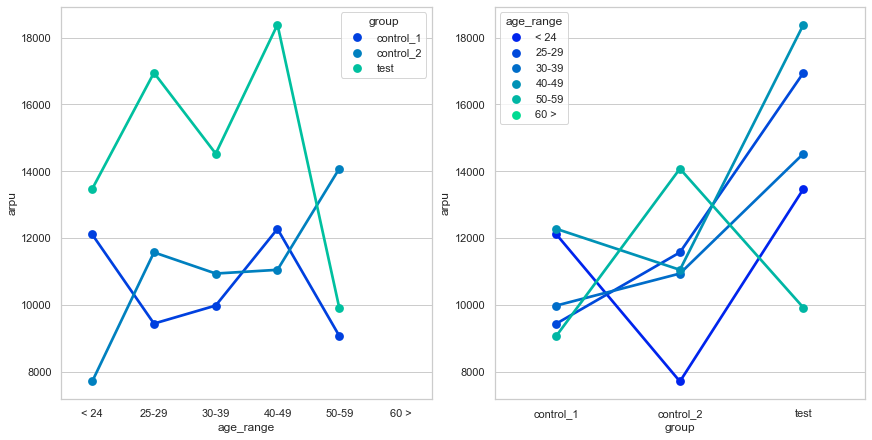

In [180]:
#check correlation between different ages and total_revenue
fig, ax = plt.subplots(1, 2, constrained_layout=True)

df_users['age_range']=pd.cut(df_users.age, bins=[18, 25, 30, 40, 50, 60, 80],  
                             labels=['< 24', '25-29', '30-39', '40-49', '50-59', '60 >'])

df_age=df_users.query('total_revenue>0')\
            .groupby(['age_range', 'group'])\
            .agg({'total_revenue':'mean'}).reset_index()\
            .rename(columns={'total_revenue':'arppu'})

sns.pointplot(x = 'age_range', y = 'arppu', hue = 'group', data = df_age, ax=ax[0], palette="winter")
sns.pointplot(x = 'group', y = 'arppu', hue = 'age_range', data = df_age, ax=ax[1], palette="winter")

In [191]:
#check H0 for ages under 24
df_24 = df_users.query('age<24')[['uid', 'group', 'cr']]
stat_24, p_24, dof, expected = chi2_contingency(pd.crosstab(df_24.cr, df_24.group))
print(stat_24, p_24)
prob = 0.95
alpha = 1.0 - prob
if p_24 <= alpha:
    print('Отклоняем H0 для возраста меньше 24, есть статистически значимые различия')
else:
    print('Не отклоняем H0 для возраста меньше 24, нет статистически значимых различий')

2.095109356915888 0.3507945065241927
Не отклоняем H0 для возраста меньше 24, нет статистически значимых различий


In [190]:
#check H0 for ages 25-30
df_25_31=df_users.query('24<age<31')[['uid', 'group', 'cr']]
stat_25_31, p_25_31, dof, expected = chi2_contingency(pd.crosstab(df_25_31.cr, df_25_31.group))
print(stat_25_31, p_25_31)
prob = 0.95
alpha = 1.0 - prob
if p_25_31 <= alpha:
    print('Отклоняем H0 для возраста 25-30, есть статистически значимые различия')
else:
    print('Не отклоняем H0 для возраста 25-30, нет статистически значимых различий')

12.31263963312018 0.0021200410727226938
Отклоняем H0 для возраста 25-30, есть статистически значимые различия


In [193]:
#check H0 for ages 31-39
df_31_39= df_users.query('30<age<40')[['uid', 'group', 'cr']]
stat_31_39, p_31_39, dof, expected = chi2_contingency(pd.crosstab(df_31_39.cr, df_31_39.group))
print(stat_31_39, p_31_39)
prob = 0.95
alpha = 1.0 - prob
if p_31_39 <= alpha:
    print('Отклоняем H0 для возраста 31-39, есть статистически значимые различия')
else:
    print('Не отклоняем H0 для возраста 31-39, нет статистически значимых различий')

8.355268326174524 0.015334744188703687
Отклоняем H0 для возраста 31-39, есть статистически значимые различия


In [194]:
#check H0 for ages 40-49
df_39_50= df_users.query('39<age<50')[['uid', 'group', 'cr']]
stat_39_50, p_39_50, dof, expected = chi2_contingency(pd.crosstab(df_39_50.cr, df_39_50.group))
print(stat_39_50, p_39_50)
prob = 0.95
alpha = 1.0 - prob
if p_39_50 <= alpha:
    print('Отклоняем H0 для возраста 40-49, есть статистически значимые различия')
else:
    print('Не отклоняем H0 для возраста 40-49, нет статистически значимых различий')

3.8904626921902774 0.14295414762843456
Не отклоняем H0 для возраста 40-49, нет статистически значимых различий


In [195]:
#check H0 for ages 50-59
df_50_59 = df_users.query('49<age<60')[['uid', 'group', 'cr']]
stat_50_59, p_50_59, dof, expected = chi2_contingency(pd.crosstab(df_50_59.cr, df_50_59.group))
print(stat_50_59, p_50_59)
prob = 0.95
alpha = 1.0 - prob
if p_50_59 <= alpha:
    print('Отклоняем H0 для возраста 50-59, есть статистически значимые различия')
else:
    print('Не отклоняем H0 для возраста 50-59, нет статистически значимых различий')

4.429944382949282 0.10915654968893843
Не отклоняем H0 для возраста 50-59, нет статистически значимых различий


In [196]:
#check H0 for ages 60+
df_60plus= df_users.query('59<age')[['uid', 'group', 'cr']]
stat_60plus, p_60plus, dof, expected = chi2_contingency(pd.crosstab(df_60plus.cr, df_60plus.group))
print(stat_60plus, p_60plus)
prob = 0.95
alpha = 1.0 - prob
if p_60plus <= alpha:
    print('Отклоняем H0 для возраста 60+, есть статистически значимые различия')
else:
    print('Не отклоняем H0 для возраста 60+, нет статистически значимых различий')

0.07226166328600402 0.9645140962640955
Не отклоняем H0 для возраста 60+, нет статистически значимых различий


#### 5.2. Country

H0: нет статистически значимых различий в конверсии в разных странах.  

In [80]:
df_country=df_users.groupby(['country', 'group'], as_index = False) \
                   .agg({'uid':'count', 'cr':'sum'}) \
                   .sort_values('cr', ascending = False) \
                   .query('cr >= 1')

countries = df_country.country.values 
countries_hi_squared = {}
for country in countries:
    df_country = df_users.query('country == @country')[['uid', 'group', 'cr']]
    stat, p, dof, expected = chi2_contingency(pd.crosstab(df_country.cr, df_country.group))
    countries_hi_squared[country] = p
    
pd.DataFrame(list(countries_hi_squared.items()), columns=['country', 'p_value'])

,country,p_value
0,United States of America,0.184365
1,France,0.728213
2,United Arab Emirates,0.392271
3,Spain,0.275907
4,Israel,0.121117
5,Italy,0.715664
6,Argentina,0.600126
7,Belgium,0.108751
8,United Kingdom (Great Britain),0.544543
9,Chile,0.901585


#### 5.3. Attraction_coeff 

H0: нет статистически значимых различий в конверсии в группах с разным коэффициентом.  

/var/folders/p1/qvc7y2xx4gqb1vfnk2ng04l40000gp/T/ipykernel_89379/1474056273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users['attraction_coeff_range']=pd.cut(df_users.attraction_coeff, bins=[-1, 250, 529, 1000],


<AxesSubplot:xlabel='group', ylabel='arppu'>

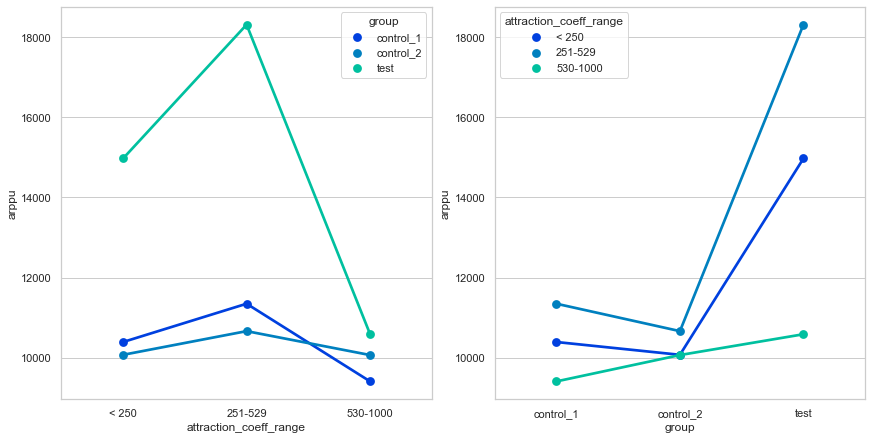

In [188]:
#check correlation between different ages and total_revenue
fig, ax = plt.subplots(1, 2, constrained_layout=True)

df_users['attraction_coeff_range']=pd.cut(df_users.attraction_coeff, bins=[-1, 250, 529, 1000],  
                                          labels=['< 250', '251-529', '530-1000'])

df_attraction_coeff=df_users.query('total_revenue>0')\
                             .groupby(['attraction_coeff_range', 'group'])\
                             .agg({'total_revenue':'mean'}).reset_index()\
                             .rename(columns={'total_revenue':'arppu'})

sns.pointplot(x = 'attraction_coeff_range', y = 'arppu', hue = 'group', 
              data = df_attraction_coeff, ax=ax[0], palette="winter")
sns.pointplot(x = 'group', y = 'arppu', hue = 'attraction_coeff_range', 
              data = df_attraction_coeff, ax=ax[1], palette="winter")

In [197]:
#check H0 for attraction_coeff<250
df_250    = df_users.query('attraction_coeff<251')[['uid', 'group', 'cr']]
stat_250, p_250, dof, expected = chi2_contingency(pd.crosstab(df_250.cr, df_250.group))
print(stat_250, p_250)
prob = 0.95
alpha = 1.0 - prob
if p_250 <= alpha:
    print('Отклоняем H0 для attraction_coeff<251, есть статистически значимые различия')
else:
    print('Не отклоняем H0 для attraction_coeff<251, нет статистически значимых различий')

2.859518017655394 0.23936660053116854
Не отклоняем H0 для attraction_coeff<251, нет статистически значимых различий


In [198]:
#check H0 for 250<attraction_coeff<529
df_251_529 = df_users.query('250<attraction_coeff<530')[['uid', 'group', 'cr']]
stat_251_529, p_251_529, dof, expected = chi2_contingency(pd.crosstab(df_251_529.cr, df_251_529.group))
print(stat_250, p_250)
prob = 0.95
alpha = 1.0 - prob
if p_251_529 <= alpha:
    print('Отклоняем H0 для 250<attraction_coeff<530, есть статистически значимые различия')
else:
    print('Не отклоняем H0 для 250<attraction_coeff<530, нет статистически значимых различий')

2.859518017655394 0.23936660053116854
Не отклоняем H0 для 250<attraction_coeff<530, нет статистически значимых различий


In [199]:
#check H0 for 530<attraction_coeff
df_530 = df_users.query('530<attraction_coeff')[['uid', 'group', 'cr']]
stat_530, p_530, dof, expected = chi2_contingency(pd.crosstab(df_530.cr, df_530.group))
print(stat_530, p_530)
prob = 0.95
alpha = 1.0 - prob
if p_530 <= alpha:
    print('Отклоняем H0 для 530<attraction_coeff, есть статистически значимые различия')
else:
    print('Не отклоняем H0 для 530<attraction_coeff, нет статистически значимых различий')

4.77039544883324 0.09207077313950493
Не отклоняем H0 для 530<attraction_coeff, нет статистически значимых различий


#### 5.4. Payment system and pages

In [168]:
#check what kind of from_pages we have and can we think that there are we see new payment system. 
#there are 3 extra, have no idea what it is exactly
df_transactions.query('group=="test"').from_page.unique()

array(['trial_vip_popup', 'autoreply_message', 'left_sidebar_menu',
       'autorefill', 'gifts', 'none', 'promo_09', 'super_popup',
       'empty_likes', 'empty_mutual', 'menu', 'popular_users_chat',
       'send_message', 'popular_users_block', 'sympathy', 'delivery_vip',
       'fans', 'dating', 'user_profile', 'likes'], dtype=object)

In [169]:
df_transactions.query('group!="test"').from_page.unique()

array(['trial_vip_popup', 'none', 'empty_likes', 'dating',
       'left_sidebar_menu', 'autorefill', 'menu', 'promo_09',
       'autoreply_message', 'fans', 'popular_users_block', 'gifts',
       'ad_to_photo', 'send_message', 'popular_users_chat',
       'user_profile', 'admins', 'no_sympathy', nan, 'empty_mutual',
       'sympathy'], dtype=object)

In [211]:
#check what kind of payment_id we have and can we think that there are we see new payment system. 
#there are no extra, have no idea what it is
df_transactions.query('group=="test"').payment_id.unique()

array([147.,  19.,  68.,  67., 146.,   0.])

In [171]:
df_transactions.query('group!="test"').payment_id.unique()

array([147.,  19., 146.,  67.,  68.,   0.,  nan])

#### 5.5. Days_of_using

H0: нет статистически значимых различий в конверсии для пользователей которые используют приложение разное количество дней.  

/var/folders/p1/qvc7y2xx4gqb1vfnk2ng04l40000gp/T/ipykernel_89379/56546937.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users['days_range']=pd.cut(df_users.days_of_using, bins=[-1, 2, 7, 14, 31],


<AxesSubplot:xlabel='group', ylabel='arppu'>

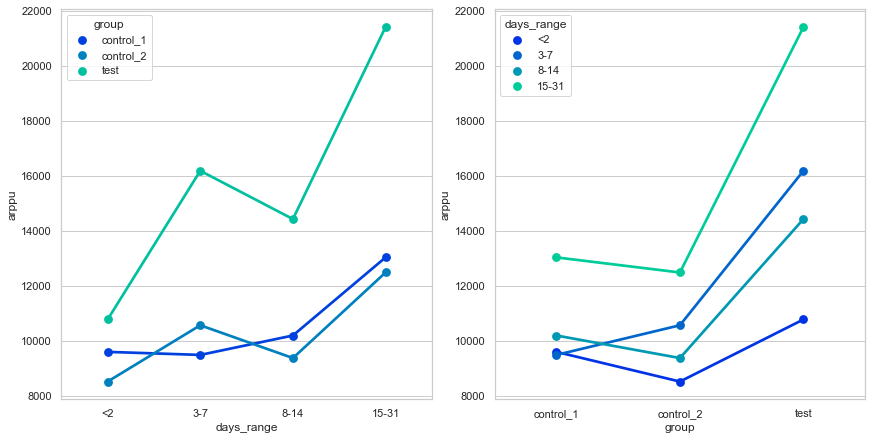

In [202]:
#check correlation between days_of_using and cr
fig, ax = plt.subplots(1, 2, constrained_layout=True)

df_users['days_range']=pd.cut(df_users.days_of_using, bins=[-1, 2, 7, 14, 31],  
                              labels=['<2', '3-7', '8-14', '15-31'])

df_days=df_users.query('total_revenue>0')\
                .groupby(['days_range', 'group'])\
                .agg({'total_revenue':'mean'}).reset_index()\
                .rename(columns={'total_revenue':'arppu'})

sns.pointplot(x = 'days_range', y = 'arppu', hue = 'group', 
              data = df_days, ax=ax[0], palette="winter")
sns.pointplot(x = 'group', y = 'arppu', hue = 'days_range', 
              data = df_days, ax=ax[1], palette="winter")

In [205]:
#check H0 for days_of_using<2
df_2 = df_users.query('days_of_using<2')[['uid', 'group', 'cr']]
stat_2, p_2, dof, expected = chi2_contingency(pd.crosstab(df_2.cr, df_2.group))
print(stat_2, p_2)
prob = 0.95
alpha = 1.0 - prob
if p_2 <= alpha:
    print('Отклоняем H0 для age<2, есть статистически значимые различия')
else:
    print('Не отклоняем H0 для age<2, нет статистически значимых различий')

2.382664780328752 0.3038161925632369
Не отклоняем H0 для age<2, нет статистически значимых различий


In [206]:
#check H0 for 2<days_of_using<7
df_week = df_users.query('1<days_of_using<8')[['uid', 'group', 'cr']]
stat_week, p_week, dof, expected = chi2_contingency(pd.crosstab(df_week.cr, df_week.group))
print(stat_2, p_2)
prob = 0.95
alpha = 1.0 - prob
if p_week <= alpha:
    print('Отклоняем H0 для week, есть статистически значимые различия')
else:
    print('Не отклоняем H0 для week, нет статистически значимых различий')

2.382664780328752 0.3038161925632369
Не отклоняем H0 для week, нет статистически значимых различий


In [207]:
#check H0 for 7<days_of_using<15
df_2weeks = df_users.query('7<days_of_using<15')[['uid', 'group', 'cr']]
stat_2weeks, p_2weeks, dof, expected = chi2_contingency(pd.crosstab(df_2weeks.cr, df_2weeks.group))
print(stat_2, p_2)
prob = 0.95
alpha = 1.0 - prob
if p_2weeks <= alpha:
    print('Отклоняем H0 для 2weeks 7<days_of_using<15, есть статистически значимые различия')
else:
    print('Не отклоняем H0 для 2weeks 7<days_of_using<15, нет статистически значимых различий')

2.382664780328752 0.3038161925632369
Не отклоняем H0 для 2weeks 7<days_of_using<15, нет статистически значимых различий


In [208]:
#check H0 for 14<days_of_using
df_month= df_users.query('14<days_of_using')[['uid', 'group', 'cr']]
stat_month, p_month, dof, expected = chi2_contingency(pd.crosstab(df_month.cr, df_month.group))
print(stat_2, p_2)
prob = 0.95
alpha = 1.0 - prob
if p_month <= alpha:
    print('Отклоняем H0 для month 14<days_of_using, есть статистически значимые различия')
else:
    print('Не отклоняем H0 для month 14<days_of_using, нет статистически значимых различий')

2.382664780328752 0.3038161925632369
Не отклоняем H0 для month 14<days_of_using, нет статистически значимых различий


#### 5.6. As a result of last step (напишу на русском):

> Мы проверили все обозначение факторы, по которым мы могли бы предположить разную манеру поведения взависимости от значения фактора на изменение цены премиальнйо подписки и метода оплаты. 

> Мы видим, что конверсия изменилась статистически значимо для возрастной группы 25-39. 

# Общий вывод:

По результатам проверки данных и проведения A/A/B теста мы не можем сказать однозначно, что тест был успешен, так как: 
1. ARPU статистически значимо не изменилось; 
2. ARPPU статистически значимо изменилось в положительную сторону; 
3. CR в премиальную подписку (любое is_premium) на премиум статистически значимо уменьшилась. Причем уменьшение было в группе возраста 25-39;

Что делать?
Стоит продолжить тест но с изменением условий:
1. Имеет смысл сохранить возрастную группу 25-39 и подходить к ней иным образом. (скидка, спецпредложение, более понятный метод оплаты)
2. Подписка ежемесячная, нам неизвестен срок trail_premium,  имеет смысл собирать данные при изменении ежемесячной подписки не за 4 недели (месяц), а за 5 недель, тогда мы будем видеть реальную конверсию. Так как вероятно сначала пользователь использует бесплатный пробный период.
3. Была допущена ошибка в сборе дат регистраций и оплат. Следует проверить форму сбора данной информации.
4. 23-24% зарегистрировавашихся пользователей не активировали, ни разу не вошли в приложение. Следует проверить являются ли данные пользователи настоящими, а также какие проблемы могли возникнуть при активизации аккаунта.
5. Результат A/B теста по ARPPU мы можем отвергнуть нулевую гипотезу об отсутсвии статистически значимого различия для ARPPU для всех платящих пользователей, у нас статистически значимо изменилось и для premium_no_trail, так и для всех, кто is_premium, и просто платящих пользователей, все же надо уточнить что означает is_premium, а также others.